# SUMMARY, HOW IT IS DONE
1. get data set
2. get some quick info using pd.head(), pd.summary(), pd.info()
3. visualise the data as much as possible
4. get rid of missing values, or not needed ones, fix  categorical columns with text
5. divide into train and test set
  - stratified mix (if small data set), mixes and keeps the right mixing order
  - mix just randomly - for big datasets
6. scale features - normalisation, standardisation
7. select and train models
8. evaluate (using cross validation?)
9. fine tune models (in case of sklearn automatically?)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
import pandas as pd
import sklearn

print("numpy version: ", np.__version__)
print("matplotlib version: ", mpl.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)


C:\Users\lazni\PycharmProjects\Training\venv\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


numpy version:  1.24.4
matplotlib version:  3.8.2
pandas version:  2.1.3
sklearn version:  1.3.2


In [2]:
# import custom module to separate text in console
from separator import SeparateText

s = SeparateText()

# LOAD THE DATA AND DO SOME QUICK CHECKING


In [3]:
def load_data(path_or_url: str):
    """
    load data from path or url
    :param path_or_url: 
    :return: Pandas DataFrame
    """
    return pd.read_csv(path_or_url)


housing_dataset = load_data(
    path_or_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
)

# show first 5 rows
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# SHOW SOME INFO ABOUT DATASET

In [4]:
# - check for missing values like 20640 vs 2433, etc...
# - check for d-types - ocean proximity is not number
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


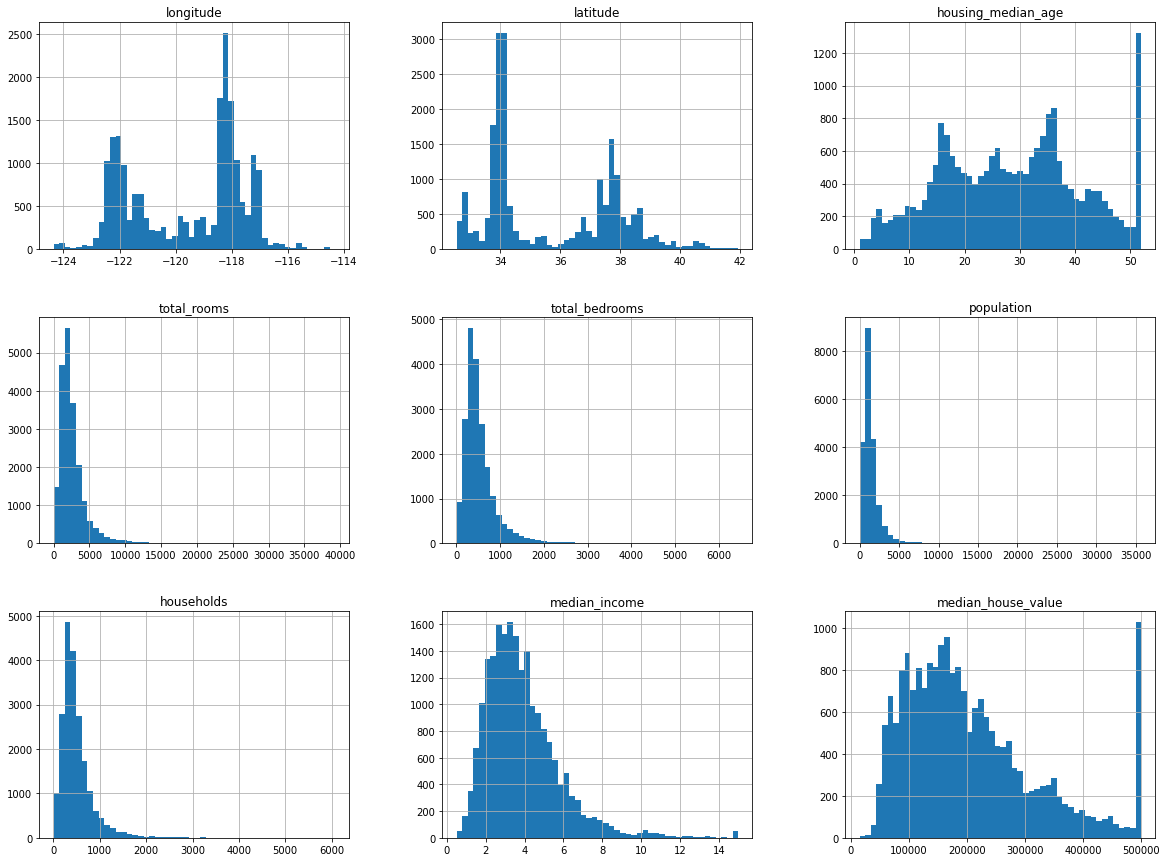

In [6]:
# a histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)
housing_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
# see that ocean proximity can be actually categorical because many values repeat
housing_dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split


# split to train and test set
# print statements inside are only just for better understanding of what is happening
def split_train_test(data: pandas.DataFrame, test_ratio: float):
    """
    split data into train and test set
    :param data: pandas DataFrame
    :param test_ratio: float
    :return: train set, test set
    """
    np.random.seed(42)
    # permutation shuffles the data se the print statement below will show different order of letters
    shuffled_indices = np.random.permutation(len(data))
    print(f"{np.random.permutation(['a', 'b', 'c', 'd', 'e'])=}")

    # split the data into two sets using list slicing
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # visualise the data
    print(f"{len(shuffled_indices)=}")
    print(f"{test_set_size=}")
    print(f"{len(test_indices)=}")
    print(f"{len(train_indices)=}")

    # iloc locates data by index in pandas
    return data.iloc[train_indices], data.iloc[test_indices]


# call the function just for visualisation of printed statements. The function is not used in the rest of the code
split_train_test(housing_dataset, 0.2)

# split the complete dataset on the train data and test data
# this is sickit learn version of custom function above
train_set, test_set = train_test_split(housing_dataset, test_size=0.2, random_state=42)



np.random.permutation(['a', 'b', 'c', 'd', 'e'])=array(['d', 'b', 'a', 'e', 'c'], dtype='<U1')
len(shuffled_indices)=20640
test_set_size=4128
len(test_indices)=4128
len(train_indices)=16512


In [9]:
print("number of rows & number of columns", train_set.shape)
print("number of rows & number of columns", test_set.shape)

number of rows & number of columns (16512, 10)
number of rows & number of columns (4128, 10)


In [10]:
housing_dataset["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


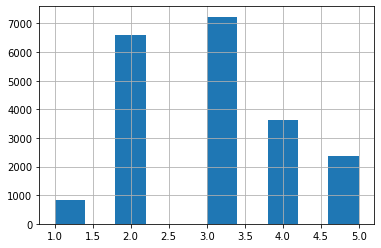

In [11]:
# pd.cut is used to group into categories (could convert ages to groups of age ranges)

# as shown on histogram above, most values are between 1,5 and 6
# bins are here as 5 section, starting with 0-1,5 (0-15000$), etc...
# labels are values the dataset is going to be changed to
housing_dataset["income_cat"] = pd.cut(housing_dataset["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                       labels=[1, 2, 3, 4, 5])
# now the data are labeled into 5 categories
print(housing_dataset["income_cat"].head())
housing_dataset["income_cat"].hist()
plt.show()

# STRATIFY THE DATA
Stratify data to make sure that the train and test set have the same ratio of instances across all cataegories.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# X - target dataset to be stratified
# y - dataset based on X will be stratified (in this case by income_cat)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
generator_ = stratified_split.split(X=housing_dataset, y=housing_dataset["income_cat"])
train_index, test_index = next(generator_)

# seems this will move the rows based on the position of the old index on the new index. Meaning if old row number 4000 (was previously on index 4000) is now on index 0, it will be moved to index 0 in the new dataset. I can be wrong here, but it seems like it.
strat_train_set = housing_dataset.loc[train_index]  # check the data in cells below
strat_test_set = housing_dataset.loc[test_index]  # check the data in cells below
print(f"{train_index=}\n" + s.separator())
print(f"{test_index=}\n" + s.separator())

train_index=array([12655, 15502,  2908, ..., 19263, 19140, 19773], dtype=int64)
[1] -------------------------------------------------------------------------------

test_index=array([ 5241, 17352,  3505, ..., 17223, 10786,  3965], dtype=int64)
[2] -------------------------------------------------------------------------------


In [13]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [14]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3


In [15]:
# compare how the stratification kept the ratios of income categories
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
# see that on average the ratios are the same with original dataset, which is what we want. What we want is to have the same ratios of income categories in both datasets (train and test)
housing_dataset["income_cat"].value_counts() / len(housing_dataset)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [17]:
# Seems that income category was created previously mainly as a key for stratification. Now it is not needed anymore and can be dropped
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
print(f"{strat_train_set.shape=}")
print(f"{strat_test_set.shape=}")

strat_train_set.shape=(16512, 10)
strat_test_set.shape=(4128, 10)


In [19]:
# stratification does not have any impact on the actual values between original data set and stratified dataset, it distributes data between test and train set with the right split. Check the those 2 cells below, they are the same still.
housing_dataset.iloc[5241]

longitude               -118.39
latitude                  34.12
housing_median_age         29.0
total_rooms              6447.0
total_bedrooms           1012.0
population               2184.0
households                960.0
median_income            8.2816
median_house_value     500001.0
ocean_proximity       <1H OCEAN
income_cat                    5
Name: 5241, dtype: object

In [20]:
strat_test_set.iloc[0]

longitude               -118.39
latitude                  34.12
housing_median_age         29.0
total_rooms              6447.0
total_bedrooms           1012.0
population               2184.0
households                960.0
median_income            8.2816
median_house_value     500001.0
ocean_proximity       <1H OCEAN
Name: 5241, dtype: object

# VISUALISE THE DATA

<Axes: xlabel='longitude', ylabel='latitude'>

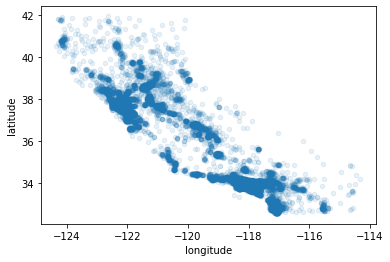

In [21]:
# create a copy of dataset to play with using visualisations
housing_df_copy = strat_train_set.copy()

# plotting of pandas dataframe
housing_df_copy.plot(kind="scatter",
                     x="longitude",
                     y="latitude",
                     alpha=0.1)  # alpha to visualise better density of points (from 0.0 to 1.0)

<Axes: xlabel='longitude', ylabel='latitude'>

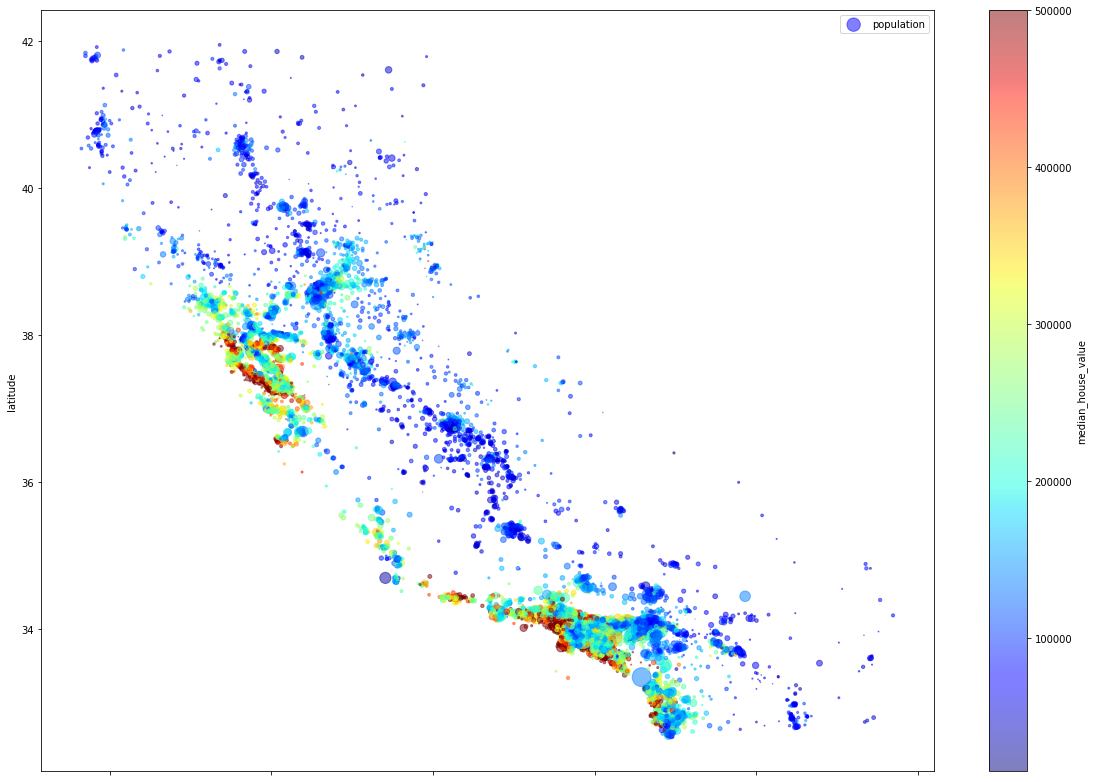

In [32]:
housing_df_copy.plot(
    kind="scatter",  # type of graph
    x="longitude",  # x axis
    y="latitude",  # y axis
    alpha=0.5,  # described in one cell above
    s=housing_df_copy["population"] / 100,  # size of the circle based on population
    label="population",  # label in right corner
    figsize=(20, 14),  # size of image
    c="median_house_value",  # color palette based on median house value
    cmap="jet",  # select color map
    colorbar=True,  # that scale on the right
    legend=True  # population
)

### looking for corelations


DataFrame.corr(method='pearson', min_periods=1)[source]
Compute pairwise correlation of columns, excluding NA/null values.

In [23]:
# possible to check only linear correlations
correlation_matrix = housing_df_copy.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'INLAND'

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# diagonal can be histogram or kernel density estimator
scatter_matrix(housing_df_copy[attributes], figsize=(12, 8), diagonal="kde")

In [ ]:
# the most promissing correlation is house value vs income, lets plot it

housing_df_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


In [ ]:
# experiment more with correlations
housing_df_copy["rooms_per_household"] = housing_df_copy["total_rooms"] / housing_df_copy[
    "households"]
housing_df_copy["bedrooms_per_room"] = housing_df_copy["total_bedrooms"] / housing_df_copy[
    "total_rooms"]
housing_df_copy["population_per_household"] = housing_df_copy["population"] / housing_df_copy[
    "households"]

# check correlations again with custom inputs
corr_matrix = housing_df_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# prepare data for ML algorithms
  (it makes sense to create some functions for future reusability)

In [ ]:
housing_df_copy = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### data cleaning

In [ ]:
# options to get rid of missing values

# 3 options:

housing_df_copy.dropna(subset=["total_bedrooms"])  # option 1 (drop missing values)
housing_df_copy.drop("total_bedrooms", axis=1)  # option 2 (drop whole column)
median = housing_df_copy["total_bedrooms"].median()  # get median value

housing_df_copy["total_bedrooms"].fillna(median, inplace=True)  # replace misisng values with median


In [ ]:
# you can use simple imputer to compute median for each column
# works only on columns with number (rest has to be droped)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# drop a column which is not numeric
housing_numeric = housing_df_copy.drop("ocean_proximity", axis=1)
imputer.fit(housing_numeric)

# return mean for each column in dataframe (the same 2 outputs)
print(imputer.statistics_)
housing_numeric.median().values  # use .values to return it in a array

In [ ]:
# fix text or categorical attributes
housing_categorical = housing_df_copy[["ocean_proximity"]]
housing_categorical.head(7)  # number of elements returned by head


In [ ]:
"""# difference between single and double suquare brackets (this cell and cell above)
housing_categorical = housing["ocean_proximity"]
housing_categorical.head()"""

In [ ]:
# convert categorical text to nubers
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_categorical)
print(housing_cat_encoded[:10])  # this is now numpy array
print()

# you can check the categories:
print(ordinal_encoder.categories_)

In [ ]:
# one hot encode categorical attributes
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_car_1hot = cat_encoder.fit_transform(housing_categorical)
housing_car_1hot

### custom transformer
- needs tom be clarified what it actually does

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args, **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
        housing_extra_attribs = attr_adder.transform(housing_df_copy.values)


### feature scaling (2 types):
- min-max scaling (normalisation) OR standartization
- should be used only on train data?

normalization - shift everything into range 0-1

standartisation (less affected by outliers) - 

### transformation pipelines
sklearn has transformation pipeline to offer some help with transforming data

(all workflow steps of transforming data)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_numeric)

In [ ]:
type(housing_num_tr)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numeric)
print(num_attribs)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing_df_copy)

# select and train a model

### training and evaluating on the training set
- linear regression

In [ ]:
print(housing_df_copy.iloc[:1])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# let's try the model out on some data
some_data = housing_df_copy.iloc[
            :4]  # seem to return number of rows based on the inputed numer, similar to .head()
some_labels = housing_labels.iloc[:4]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

# predictions vs labels will have some difference

In [ ]:
# measure RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)  # compute RMSE from the square root of MSE

print("rmse", lin_rmse, "how much dollars are we off from the range $15-500K")

- decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)  # compute RMSE from the square root of MSE

print("rmse", tree_rmse, "how much dollars are we off from the range $15-500K")

# printed value will be 0, meaning model is probably hugely overfitting

- random forst regresssor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)  # compute RMSE from the square root of MSE

print("rmse", forest_rmse, "how much dollars are we off from the range $15-500K")

### cross-validation for better evaluation

![images/cross_validation.png](../images/cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

# evaluate decision tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores, dtype=np.float32)


def display_scores(scores):
    print("scores:", scores)
    print("mean", scores.mean())
    print("standart deviation", scores.std())


# here decision tree performs even worse than linear regression (probably due to overfitting)
print(display_scores(tree_rmse_scores))

In [ ]:
# evaluate linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores, dtype=np.float32)

print(display_scores(lin_rmse_scores))

In [ ]:
# evaluate random forest 
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores, dtype=np.float32)

print(display_scores(forest_rmse_scores))

# fine tune your models

- GridSearchCV (good when trying to find out just a few combinations)

In [ ]:
# for some automated finding of hyperparameter tuning use grid search from sklearn
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 10], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=False)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
# check what should be the best parameters after grid search
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvresult = grid_search.cv_results_  #(seems like in cv result are hidden some resutls of grid search?)

# with zip you can iterate with two iterables at once
for mean_score, params in zip(cvresult["mean_test_score"], cvresult["params"]):
    print(np.sqrt(-mean_score), params)


- RandomizedSearchCV
>use when you want to allocate more computational power. Search will be executed by chosing random parameters over number of iterations you specify (bigger potential to find good params)

# analyse the best models and their errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# TODO: have not idea what this does

# lets display above importance scores next to their corresponding attribute names:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)


# evaluate your system on the test set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_predictions, final_mse, final_rmse, sep="\n")

In [ ]:
# compute 95% confidence interval
#(out of all intervals computed at the 95% level, 95% of them should contain the parameter's true value.)

from scipy import stats

confidence = 0.95
squared_erros = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_erros) - 1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_erros))
        )


In [ ]:
a = final_model.predict(X_test_prepared[:10])
b = y_test.iloc[:10]

print(abs(a - b))
print()
print(abs(a - b).mean())
# seems like the mean error is truly around 54 000??

# Exercises

try to create a transformer which selects the most important columns in the dataset


try to check what does randomizedsearchcv instead of gridseachcv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 2000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
# unqoute this:
"""rnd_search.fit(housing_prepared, housing_labels)"""


try to create a full pipeline which transforms the data and predicts

In [ ]:
# predicting pipeline
prediction_pipeline = Pipeline([
    ("final_pipeline", full_pipeline),
    ("regression", LinearRegression())
])

fitting = prediction_pipeline.fit(housing_df_copy, housing_labels)

prediction = fitting.predict(some_data)

print(prediction)
some_labels = [item for item in some_labels]
print(some_labels)
print(abs(prediction - some_labels).mean())